In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Import a function for plotting decision boudaries
#!pip install mlxtend
from mlxtend.plotting import plot_decision_regions
from sklearn.linear_model import Perceptron


In [2]:
# Read the iris dataset into a pandas DataFrame object
df = pd.read_csv("iris_dataset.csv")

In [3]:
# We need only versicolor and virginica which are from 51st to 150th rows

df = df.iloc[50:150]
df

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [4]:
X = df[["sepal_length", "petal_length"]]

In [5]:
# Store the labels in y
y = df['species']

# We can leave the original labels and use sklearn perceptron,
# but to use mlxtend for plotting we need to encode the labels
# versicolor = -1 , virginica = +1

y = np.where(y == 'versicolor', -1, 1)
y

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [6]:
# Instantiate one instance of the Perceptron class
clf = Perceptron()

# Fit the model to the training data
clf.fit(X, y)

Perceptron()

In [7]:
y_pred = clf.predict(X)
y_pred

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1,  1,  1, -1,  1,  1,
        1, -1, -1,  1,  1, -1,  1,  1, -1, -1,  1, -1,  1, -1,  1, -1,  1,
       -1,  1,  1, -1, -1,  1, -1,  1,  1,  1, -1, -1, -1,  1,  1])

In [8]:
# Actual labels
y

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [9]:
# Compare actual and predicted labels
print(y == y_pred)


[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True False  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
 False False False  True  True False  True  True  True False False  True
  True False  True  True False False  True False  True False  True False
  True False  True  True False False  True False  True  True  True False
 False False  True  True]


In [10]:
# calculate accuracy of this model for this particular set
clf.score(X,y)

0.8

In [11]:
clf.coef_   # weights

array([[-56.5,  74.9]])

In [12]:
clf.intercept_  # bias 

array([-38.])

/Users/rohitkumbar/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


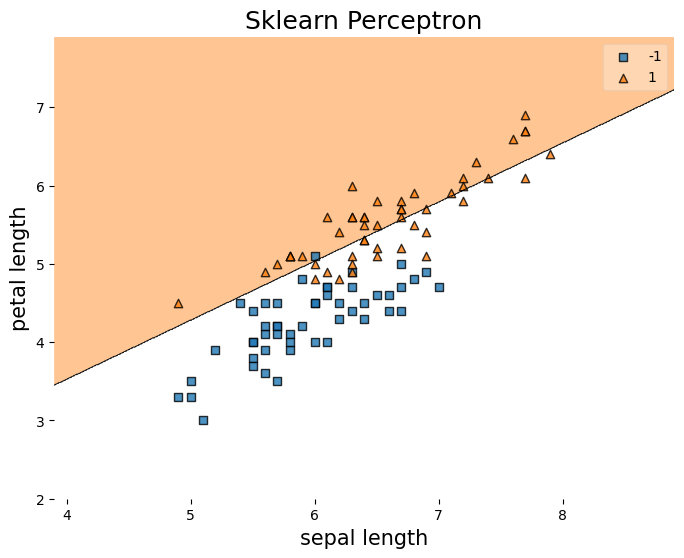

In [13]:
plt.figure(figsize = (8, 6))
plot_decision_regions(X.to_numpy(), y, clf = clf)
plt.title("Sklearn Perceptron", fontsize = 18)
plt.xlabel("sepal length", fontsize = 15)
plt.ylabel("petal length", fontsize = 15);

In [14]:
# We can use this classifier to predict the species of a flower with measurements 6 (sepal length) and 6 (petal length.)
# Observing the graph above, the label should be 1. 

clf.predict([[6, 6]])

/Users/rohitkumbar/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


array([1])

In [15]:
# We plot the errors for each iteration
# We also see the number of iterations needed for the algorithm to find the classifier

'''plt.figure(figsize = (8, 6))
plt.plot(range(1, len(clf.errors)+1), clf.errors, 
         marker = "o")
plt.title("Error plot", fontsize = 15)
plt.xlabel("The number of iterations", fontsize = 15)
plt.ylabel("The number of misclassifications", fontsize = 15)
plt.xticks(range(1, len(clf.errors)+1))
plt.show()'''

'plt.figure(figsize = (8, 6))\nplt.plot(range(1, len(clf.errors)+1), clf.errors, \n         marker = "o")\nplt.title("Error plot", fontsize = 15)\nplt.xlabel("The number of iterations", fontsize = 15)\nplt.ylabel("The number of misclassifications", fontsize = 15)\nplt.xticks(range(1, len(clf.errors)+1))\nplt.show()'